In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Social_Network_Ads.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.drop('User ID',axis = 1,inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

<Axes: >

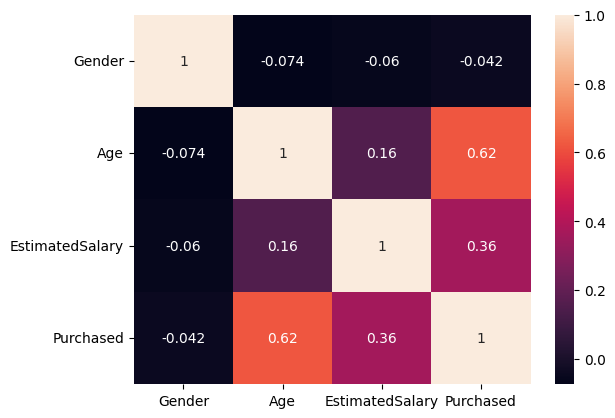

In [ ]:
sns.heatmap(df.corr(),annot = True)

In [ ]:
df.drop('Gender',axis = 1,inplace = True) #Gender is insignificant

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Purchased',axis = 1)
y = df['Purchased']
X_train, x_test,Y_train,y_test = train_test_split(X,y,test_size = 0.33)

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,Y_train)

y_pred = model.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, roc_curve
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9015151515151515
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        87
           1       0.85      0.87      0.86        45

    accuracy                           0.90       132
   macro avg       0.89      0.89      0.89       132
weighted avg       0.90      0.90      0.90       132



Text(0.5, 1.0, 'Confusion Matrix')

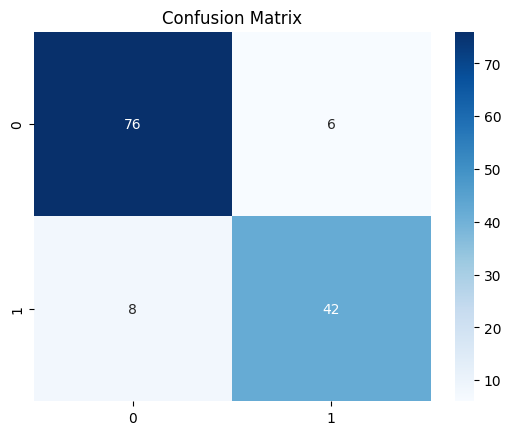

In [ ]:

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap = 'Blues',annot= True)
plt.title("Confusion Matrix")

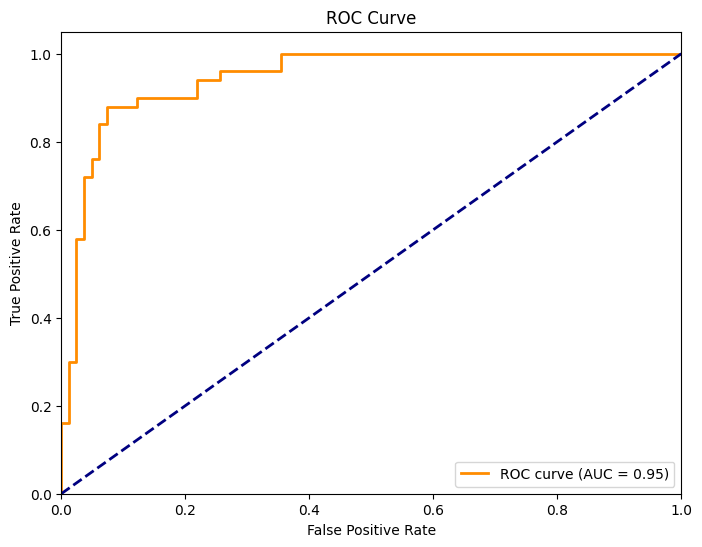

In [ ]:
y_pred_proba = model.predict_proba(x_test)[:,1]

fpr,tpr,_ = roc_curve(y_test,y_pred_proba)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color = 'darkorange', lw = 2, label =f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],color = 'navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()